## This script is to verify the continuity property of CFs of Heston model (price process) mentioned in Cui(2017)
Four formats of CFs were mentioned in the paper

## Also try to discuss the continuity property of vol process (CIR) in Heston model
Two formats of CFs are found now

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.special import erf

%matplotlib inline
#%matplotlib tk

## Model

dSt = mu St dt + sqrt(vt) St dWt,

dvt = k (vbar - vt) dt + sigma sqrt(vt) dWt

## CF of price

In [2]:
S0 = 1.0
k = 3.0
vbar = 0.1
sigma = 0.25
rho = -0.8
v0 = 0.08
K = 1.1
r = 0.02
q = 0
tau = 15.0
F = S0*np.exp((r - q)*tau)

In [58]:
u = np.array(np.linspace(0.0001, 4, 200))
u.shape

(200,)

In [12]:
def defineParts(u):
    xi = k - sigma*rho*1j*u
    d = (xi**2 + sigma**2*(u**2 + 1j*u))**0.5
    g1 = (xi + d) / (xi - d)
    g2 = (xi - d) / (xi + d)

    A1 = (u**2 + 1j*u)*np.sinh(d*tau/2)
    A2 = d/v0*np.cosh(d*tau/2) + xi/v0*np.sinh(d*tau/2)
    A = A1 / A2
    B = d*np.exp(k*tau/2)/(v0*A2)
    D = np.log(d/v0) + (k - d)*tau/2 - np.log((d + xi)/(2*v0) + (d - xi)*np.exp(-d*tau)/(2*v0))
    
    return xi, d, g1, g2, A1, A2, A, B, D

In [13]:
def CF_Heston(u):
    xi, d, g1, g2, A1, A2, A, B, D = defineParts(u)
    part1 = 1j*u*np.log(F/S0)
    part2 = k*vbar/sigma**2*((xi + d)*tau - 2*np.log((1 - g1*np.exp(d*tau))/(1-g1)))
    part3 = v0/sigma**2*(xi + d)*(1-np.exp(d*tau))/(1 - g1*np.exp(d*tau))

    CF1 = np.exp(part1 + part2 + part3)
    return CF1

In [14]:
def CF_Schoutens(u):
    xi, d, g1, g2, A1, A2, A, B, D = defineParts(u)
    part1 = 1j*u*np.log(F/S0)
    part2 = k*vbar/sigma**2*((xi - d)*tau - 2*np.log((1 - g2*np.exp(-d*tau))/(1 - g2)))
    part3 = v0/sigma**2*(xi - d) * (1 - np.exp(-d*tau))/(1 - g2*np.exp(-d*tau))
    
    CF2 = np.exp(part1 + part2 + part3)
    
    return CF2

In [15]:
def CF_Bano(u):    
    xi, d, g1, g2, A1, A2, A, B, D = defineParts(u)
    part1 = 1j*u*np.log(F/S0)
    part2 = -k*vbar*rho*1j*u*tau/sigma - A
    part3 = B**(k*vbar*2/sigma**2)
    
    CF3 = np.exp(part1 + part2) * part3
    return CF3

In [16]:
def CF_Cui(u):
    xi, d, g1, g2, A1, A2, A, B, D = defineParts(u)
    part1 = 1j*u*np.log(F/S0)
    part2 = -k*vbar*rho*1j*u*tau/sigma - A
    part3 = 2*k*vbar*D/sigma**2
    
    CF4 = np.exp(part1 + part2 + part3)
    
    return CF4

In [59]:
CF_H = CF_Heston(u)
CF_S = CF_Schoutens(u)
CF_B = CF_Bano(u)
CF_C = CF_Cui(u)

In [60]:
#%matplotlib tk
plt.plot(u, CF_H.real, 'r--')
plt.plot(u, CF_S.real, 'bX-', markevery =list(np.arange(5, u.size, 10)))
plt.plot(u, CF_B.real, 'm-.')
#plt.plot(u, CF_C.real, '-gD', markevery=list(np.arange(1, u.size, 10)))
plt.legend(['Heston', 'Schoutens', r'$Ba\~no$ Rollin'], fontsize=22)
plt.xlabel('u', fontsize=24)
plt.ylabel(r'Re $\phi(u, \tau)$', fontsize=24)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.grid()

In [19]:
def plot_Gu_of_diff_u(u_Upper, lower=0.0001, nsteps=2500):
    u = np.array(np.linspace(lower, u_Upper, nsteps))
    xi, d, g1, g2, A1, A2, A, B, D = defineParts(u)
    Gu = (1 - g1*np.exp(d*tau))/(1 - g1)
    plt.figure()
    plt.plot(Gu.real, Gu.imag)
    plt.xlabel(r'Re $G_1(u)$', fontsize=24)
    plt.ylabel(r'Im $G_1(u)$', fontsize=24)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.grid()

    plt.figure()
    plt.plot(np.log(Gu).real, np.log(Gu).imag)
    plt.xlabel(r'Re $\log$ ${G_1(u)}$', fontsize=24)
    plt.ylabel(r'Im $\log$ ${G_1(u)}$', fontsize=24)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.grid()
    return Gu

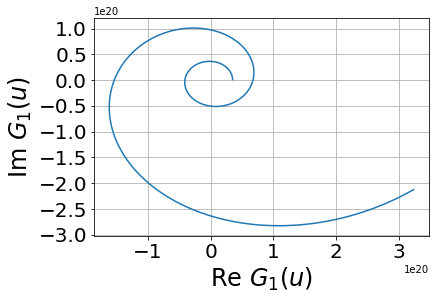

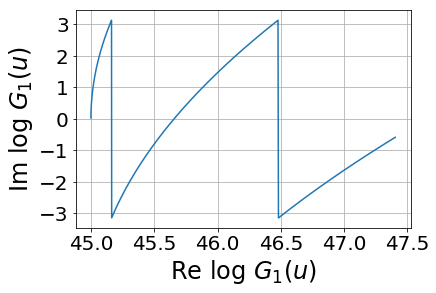

In [20]:
#for i in np.arange(2, 200, 15):
#    plot_Gu_of_diff_u(i)
#%matplotlib tk
Gu_4 = plot_Gu_of_diff_u(4, 0.01, 1000)

In [21]:
def plot_A2_of_diff_u(u_Upper, lower=0.0001, nsteps=2500):
    u = np.array(np.linspace(lower, u_Upper, nsteps))
    xi, d, g1, g2, A1, A2, A, B, D = defineParts(u)
    plt.figure()
    plt.plot(A2.real, A2.imag)
    plt.figure()
    plt.plot(u, (B**(k*vbar*2/sigma**2)).imag)

    return A2

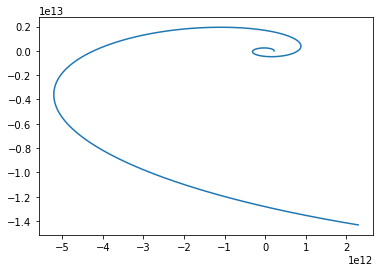

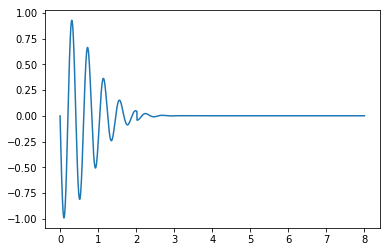

In [22]:
A2 = plot_A2_of_diff_u(8)

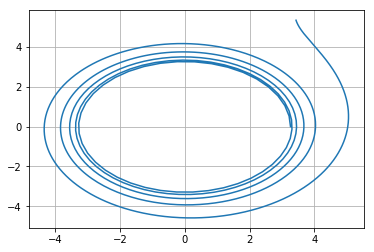

In [23]:
def plot_Ru_of_diff_u(u_Upper, lower=0.0001, nsteps=5000):
    u = np.array(np.linspace(lower, u_Upper, nsteps))
    xi, d, g1, g2, A1, A2, A, B, D = defineParts(u)
    Ru = A2 * np.log(np.log(abs(A2))) / abs(A2)
    plt.figure()
    plt.plot(Ru.real, Ru.imag)
    plt.grid()

plot_Ru_of_diff_u(500)


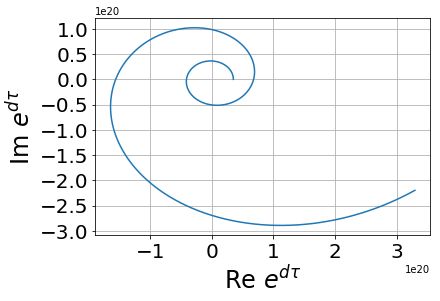

In [24]:
def plot_exp_dtau_of_diff_u(u_Upper, lower=0.0001, nsteps=2500):
    u = np.array(np.linspace(lower, u_Upper, nsteps))
    xi, d, g1, g2, A1, A2, A, B, D = defineParts(u)
    plt.figure()
    plt.plot((np.exp(d*tau)).real, (np.exp(d*tau).imag))
    plt.xlabel(r'Re $e^{d\tau}$', fontsize=24)
    plt.ylabel(r'Im $e^{d\tau}$', fontsize=24)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.grid()
plot_exp_dtau_of_diff_u(4)

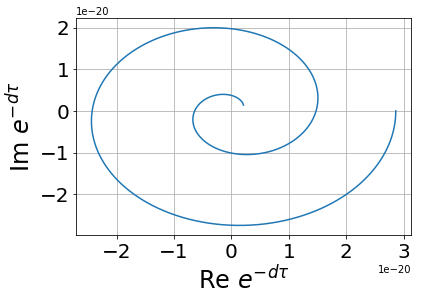

In [25]:
def plot_exp_negative_dtau_of_diff_u(u_Upper, lower=0.0001, nsteps=2500):
    u = np.array(np.linspace(lower, u_Upper, nsteps))
    xi, d, g1, g2, A1, A2, A, B, D = defineParts(u)
    plt.figure()
    plt.plot((np.exp(-d*tau)).real, (np.exp(-d*tau).imag))
    plt.xlabel(r'Re $e^{-d\tau}$', fontsize=24)
    plt.ylabel(r'Im $e^{-d\tau}$', fontsize=24)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.grid()
plot_exp_negative_dtau_of_diff_u(4)

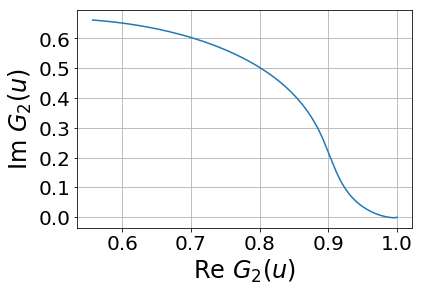

In [26]:
def plot_Gu2_of_diff_u(u_Upper, lower=0.01, nsteps=2500):
    u = np.array(np.linspace(lower, u_Upper, nsteps))
    xi, d, g1, g2, A1, A2, A, B, D = defineParts(u)
    Gu = (1 - g2*np.exp(-d*tau))/(1 - g2)
    #Gu_log = Gu * np.log(np.log(abs(Gu))) / abs(Gu)
    plt.figure()
    plt.plot(Gu.real, Gu.imag)
    plt.xlabel(r'Re $G_2(u)$', fontsize=24)
    plt.ylabel(r'Im $G_2(u)}$', fontsize=24)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.grid()
    #plt.figure()
    #plt.plot(np.log(Gu).real, np.log(Gu).imag)
plot_Gu2_of_diff_u(500)

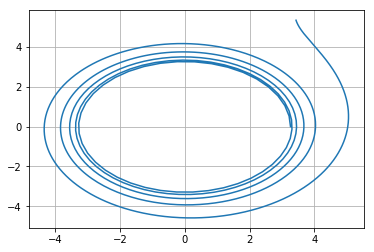

In [27]:
def plot_Ru1_of_diff_u(u_Upper, lower=0.0001, nsteps=5000):
    u = np.array(np.linspace(lower, u_Upper, nsteps))
    xi, d, g1, g2, A1, A2, A, B, D = defineParts(u)
    Gu1 = (1 - g1*np.exp(d*tau))/(1 - g1)
    Ru1 = Gu1 * np.log(np.log(abs(Gu1))) / abs(Gu1)

    plt.figure()
    plt.plot(Ru1.real, Ru1.imag)
    plt.grid()
    
plot_Ru_of_diff_u(500)

## CF of Vol

In [28]:
def CF_vol2(z):
    deno = np.cosh(k*tau/2) + (k - sigma**2*1j*z)*np.sinh(k*tau/2)/k
    part1 = (np.exp(k*tau/2)/deno)**(2*k*vbar/sigma**2)
    part2 = np.exp(v0*1j*z*(np.cosh(k*tau/2) - np.sinh(k*tau/2))/deno)
    
    CF5 = part1*part2
    
    return CF5

In [29]:
def CF_vol1(z):
    common = 1 - 1j*z*sigma**2*(1 - np.exp(-k*tau))/(2*k)
    part1 = -2*k*vbar/sigma**2*np.log(common)
    part2 = v0*1j*z*np.exp(-k*tau)/common
    
    CF6 = np.exp(part1 + part2)
    
    return CF6

In [30]:
def CF_vol3(z):
    deno = np.cosh(k*tau/2) + (k - sigma**2*1j*z)*np.sinh(k*tau/2)/k
    part1 = (2*k*vbar/sigma**2)*np.log(np.exp(k*tau/2)/deno)
    part2 = v0*1j*z*(np.cosh(k*tau/2) - np.sinh(k*tau/2))/deno
    
    CF5 = np.exp(part1+part2)
    
    return CF5

In [61]:
u = np.array(np.linspace(0.0001, 120, 2500))
u.shape

(2500,)

In [62]:
CF_CIR = CF_vol1(u)
CF_vol_Bano = CF_vol2(u)
CF_test = CF_vol3(u)

In [65]:
#%matplotlib tk
plt.plot(u, CF_CIR.real, 'rD-', markevery=list(np.arange(1, u.size, 100)))
#plt.plot(u, CF_vol_Bano.real, 'bX-', markevery =list(np.arange(1, u.size, 100)))
plt.plot(u, CF_test.real, 'bX-', markevery =list(np.arange(50, u.size, 100)))

plt.legend(['form 1', 'form 2'], fontsize=24)
plt.xlabel('u', fontsize=24)
plt.ylabel(r'Re $\phi(u, \tau)$', fontsize=24)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.grid()